# 第八周作业参考

### 参考：2019202091-徐克丰

# 第一题
## 题目描述
在sa心脏病数据中，训练集70%进行训练，其余为测试集进行预测，用chd(1:得病，0:正常)对tobacco(吸烟量)+ldl(肥胖指数)+age(年龄)按照梯度下降算法进行logistic回归系数建模，写出预测概率估计方程，在阈值0.5上进行分类，画出测试数据的ROC曲线，对训练数据的预测数据画出决策边界，讨论回归估计的结果和模型的效果。

## 参数设定
迭代次数：$n=200000$

学习率：$\alpha=0.00001$
## 代码实现

预测概率估计方程为：y=1/[1+exp{-(0.087tobacco+0.156ldl+0.048age+(-3.910))}]
测试数据的ROC曲线的AUC值为：0.753


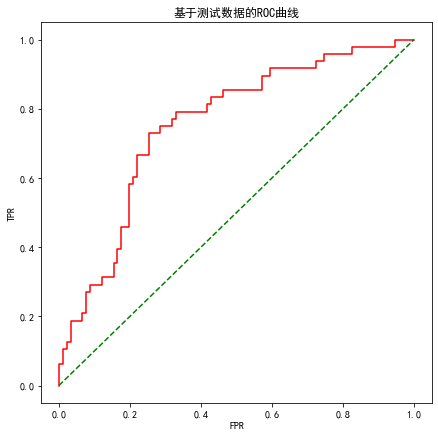

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve
def CalAUC(fpr,tpr):
    auc=0
    for i in range(len(fpr)-1):
        auc+=(fpr[i+1]-fpr[i])*(tpr[i]+tpr[i+1])*0.5
    return auc

# 用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] 

#sigmod形的函数计算
def sigmod(z):
    return 1/(1+np.exp(-z))
#函数定义：整体梯度下降算法
def GradientDesent(X,y):
    w=np.array([-3.9038449,0.08715729,0.15570463,0.0476525]) #依据先前的实验赋予w初始值
    w=w.reshape(X.shape[1],1)   #化w为列向量
    n_iter=200000  #设置迭代次数200000
    for i in range(n_iter):   #进行梯度下降
        alpha=0.00001  #设置学习率，如果学习率设置过高会导致梯度震荡，无法收敛
        z=np.dot(X,w)  #计算x和常数项的线性组合
        pr=1/(1+np.exp(-z))    #计算sigmod函数，得出一个样例为正例的概率
        w=w-alpha*np.dot(X.T,(pr-y.reshape(X.shape[0],1)))  #计算权重向量，沿着梯度下降的方向最快
    return w  #迭代完成，返回权重向量
    
#读入数据
data=pd.read_csv('saheart.csv')
X=data.loc[:,['tobacco','ldl','age']].values
y=data.loc[:,'Class'].values-1  #为了便于处理，将y简化，0为正常，1为得病
X=np.c_[np.ones(len(X)),X]   #在X最前加一列1，便于数据处理

#将数据分成训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
w=GradientDesent(X_train,y_train)   #由训练集得到参数估计，w[0]为常数项
print('预测概率估计方程为：y=1/[1+exp{-(%.3ftobacco+%.3fldl+%.3fage+(%.3f))}]'%(w[1],w[2],w[3],w[0]))
#得出测试集的概率预测
y_testpred=sigmod(X_test[:,0]*w[0]+X_test[:,1][1]*w[1]+X_test[:,2]*w[2]+X_test[:,3]*w[3])
plt.figure(figsize=(7,7))
fpr,tpr,thresholds=roc_curve(y_test,y_testpred,pos_label=1)  #pos_label是认定为正的标签个数,即y=1患病的个数
print('测试数据的ROC曲线的AUC值为：%.3f'%(CalAUC(fpr,tpr)))
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'--',color='green')
plt.title('基于测试数据的ROC曲线')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

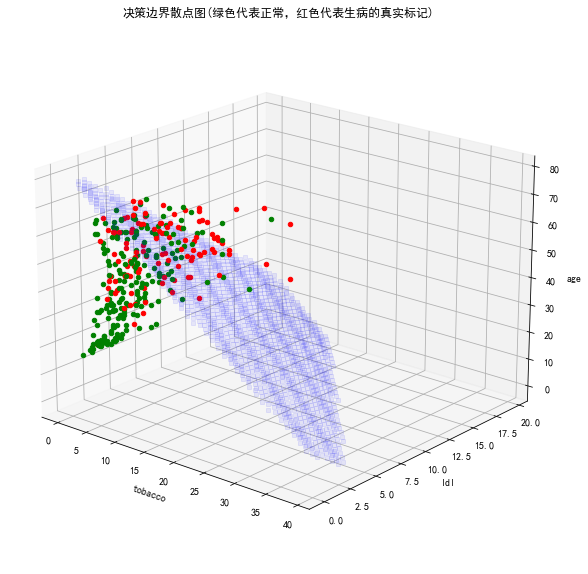

In [2]:
#绘制决策边界
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(10,10))
ax1 = plt.axes(projection='3d')
for i in range(len(X_train)):
    if y_train[i]>0.5:
        ax1.scatter3D(X_train[i,1],X_train[i,2],X_train[i,3],c='red')
    else:
        ax1.scatter3D(X_train[i,1],X_train[i,2],X_train[i,3],c='green')
ax1.set_xlabel('tobacco')
ax1.set_ylabel('ldl')
ax1.set_zlabel('age')
ax1.set_title('决策边界散点图(绿色代表正常，红色代表生病的真实标记)')
#基本的思路是将在概率为0.5附近的点(很薄的一层)画成决策面，使得正例与负例分开
#画出后发现决策面以上多为生病，决策面以下多为正常
x=np.arange(0,40,1) #tobacco
y=np.arange(0,20,0.5) #ldl
z=np.arange(0,80,2) #age
xx=[];yy=[];zz=[]
for i in range(len(x)):
    for j in range(len(y)):
        for t in range(len(z)):
            p=sigmod(w[0]+x[i]*w[1]+y[j]*w[2]+z[t]*w[3])  #计算每个点的概率
            if p<0.52 and p>0.48:
                ax1.scatter3D(x[i],y[j],z[t],alpha=0.075,c='blue',marker='s')
ax1.view_init(elev=20, azim=-50)

## 结果分析
logistic回归依据梯度下降法，当梯度值降为很小的时候，得出回归系数，求出logistic的表达式为：
$$y=\frac{1}{1+e^{-(0.087tobacco+0.156ldl+0.048age-3.910)}}$$
由测试数据绘制ROC曲线，发现曲线靠近左上方，并且经验AUC计算出来的值为0.753，说明模型的预测效果良好。最后从绘制出的决策面来看，这个分界面可以相对有效地把正例和反例分开于界面两侧，说明估计结果和模型效果比较好。

# 第二题
## 题目描述
用chd(0:正常，1:得病)对tobacco(吸烟量)+ldl(肥胖指数)+age(年龄)进行LDA建模，假设所需要的判别决策面为$f(x)=w^{T}x+w_0$，首先计算$w$，估计健康人和得病病人的三个输入变量的协方差矩阵(用极大似然估计法)和每个类的均值位置$\mu_0$和$\mu_1$，令$||w||=1$，然后根据训练数据判错率最低的要求选择$w_0$，返回系数估计，并且和$w=(0.61,-0.45,0.65)^{T}$所给出的判别面的效果进行比较。
## 代码实现

In [3]:
#读取所有正例和反例，正例为患病2(1)，反例为正常1(0)
Xpos=data.loc[data['Class']==2,['tobacco','ldl','age']].values
Xneg=data.loc[data['Class']==1,['tobacco','ldl','age']].values
y=data.loc[:,'Class'].values-1  #为了便于处理，将y简化，0为正常，1为得病
#求出均值向量
miu0=sum(Xneg)/len(Xneg)
miu1=sum(Xpos)/len(Xpos)
print('反例均值向量:',miu0)
print('正例均值向量:',miu1)
#求解类内散度矩阵,这里的散度矩阵是用教材上的方法给出.
#协方差矩阵按照课件和教材显示，没有除以n-1
sw=np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]])
for i in range(len(Xneg)):
    sw+=np.dot((Xneg[i]-miu0).reshape(3,1),(Xneg[i]-miu0).reshape(1,3))
print('反例协方差矩阵:\n',sw);
pos=np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]])
for i in range(len(Xpos)):
    pos+=np.dot((Xpos[i]-miu1).reshape(3,1),(Xpos[i]-miu1).reshape(1,3))
sw+=pos  #求解出类内散度矩阵
print('正例协方差矩阵:\n',pos)
w=np.dot(np.linalg.inv(sw),(miu0-miu1).reshape(3,1))
w=-w/np.linalg.norm(w)
print('归一化后的w:\n',w)

#求解判错率，寻找决策面,使得正例wTx在决策面的一侧，反例wTx在决策面的另外一侧
#miu0w=np.dot(w.T,miu0) #将中心点投影到所求直线上
#miu1w=np.dot(w.T,miu1)
w0=np.arange(16,18,0.0001)  #根据先前的代码，保证运行效率，所以把w0范围缩小了
minerr=10000000
suitw0=0
for i in range(len(w0)):
    err=0
    for j in range(len(Xpos)):
        if np.dot(w.reshape(1,3),Xpos[j].reshape(3,1))<w0[i]:
            err+=1
    for t in range(len(Xneg)):
        if np.dot(w.reshape(1,3),Xneg[t].reshape(3,1))>w0[i]:
            err+=1   
    if err<minerr:
        minerr=err
        suitw0=w0[i]
print('选择的w0为:%.4f'%(-suitw0))
print('此时的最小错误率为:%.4f'%(minerr/len(X)))

#与另一个向量进行比较
w1=np.array([[0.61],[-0.45],[0.65]])
w1err=0
for j in range(len(Xpos)):
    if np.dot(w1.reshape(1,3),Xpos[j].reshape(3,1))<suitw0:
        w1err+=1
for t in range(len(Xneg)):
    if np.dot(w1.reshape(1,3),Xneg[t].reshape(3,1))>suitw0:
        w1err+=1   
print('给出的w1计算的错误率为:%.4f'%(w1err/len(X)))

反例均值向量: [ 2.6347351   4.34423841 38.85430464]
正例均值向量: [ 5.524875   5.4879375 50.29375  ]
反例协方差矩阵:
 [[ 3927.21692881   466.90823907  7498.04834437]
 [  466.90823907  1053.06637483  2593.09649007]
 [ 7498.04834437  2593.09649007 66669.58940397]]
正例协方差矩阵:
 [[ 4924.3589975   -115.83499125  2974.040875  ]
 [ -115.83499125   787.20101938   387.2069375 ]
 [ 2974.040875     387.2069375  18031.19375   ]]
归一化后的w:
 [[0.40770056]
 [0.8912201 ]
 [0.19876363]]
选择的w0为:-17.4564
此时的最小错误率为:0.2662
给出的w1计算的错误率为:0.4762


In [7]:
print('反例均值投影：',np.dot(miu0,w))
print('正例均值投影：',np.dot(miu1,w))

反例均值投影： [12.66867816]
正例均值投影： [17.14002311]


## 结果分析
通过教材给出的计算方法，采用LDA建模，得出了$w=(0.041,0.891,0.199)^T$。

采用枚举的方式，确定$w_0=-17.4564$，使得正例和反例分别在决策平面$w^Tx+w_0=0$的两侧。最后得出的平面为：
$$0.041x_1+0.891x_2+0.199x_3-17.4564=0$$
采用该平面，使得正例和反例分别在此平面的一侧，得到的错误率为$0.2662$；采用$w1=(0.61,-0.45,0.65)^T,w_0$形成的决策面，使得正例和反例分别在此平面的一侧，得到的错误率为$0.4762$，所以采用第一个决策面的效果更好。

## 补充：
第二题中需要根据训练数据判错率最低的原则选择w0。

①如果我们已经求得w则可以将原样本点投影到直线w上，得到一个一维的值,$y_1=x_{11}*w_1+x_{12}*w_2+x_{13}*w_3$，每个样本得到一个投影值$y_i$。同时，正类和负类的均值也能得到一个投影，$y_{+}$和$y_{-}$.

②比较两类均值的投影值的大小，假设$y_{-}<y_{+}$.

③将所有样本投影点从小到大排序，例如排序结果为$y_4<y_2<y_1<y_3$。

④现在需要找到一个阈值$\alpha$将正类和负类的样本点投影分开。由于②中求得正类的均值投影要更大，则这里将大于阈值$\alpha$的投影点对应的原样本划分为正类。

如果$\alpha$在区间[y_4,y_2]之间无论$\alpha$取值为多少，都会将$y_4$分为负类，将$y_2,y_1,y_3$分为正类。因此只需遍历$\alpha<y_4$，$y_4<\alpha<y_2$,$y_2<\alpha<y_1$,$y_1<\alpha<y_3$,这四种情况,找出判错率最低的阈值。

## 注意
这里我用的是$\alpha$并没有用w0来说明，只是为了让大家不要把分界面想得太复杂,简单看作一个找阈值的问题就好。若$x_{i1}*w_1+x_{i2}*w_2+x_{i3}*w_3>\alpha$则将原样本划分为正类，若$x_{i1}*w_1+x_{i2}*w_2+x_{i3}*w_3<\alpha$则将原样本划分为负类，所以这里的分解面就是$x_{i1}*w_1+x_{i2}*w_2+x_{i3}*w_3=\alpha$，这里所求的$w0=-\alpha$。

本题中只给出了判错率最低的要求，没有其他信息，所以我们只能得到一个$w0$的区间，在这个区间中取任何值对训练集的判错率都不会产生影响。作业中，给出$w0$的区间、取区间中的一个整数值、利用等间距点遍历均可。

# 第三题
编程实现线性判别分析，并给出西瓜数据集$3.0\alpha$上的结果
## 代码实现


In [9]:
import warnings
warnings.filterwarnings('ignore')

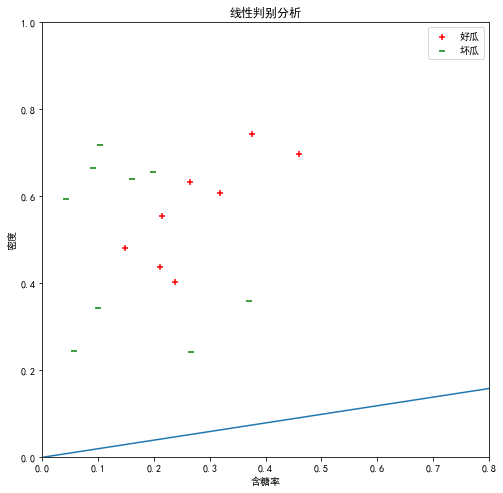

In [11]:
#从西瓜数据集中读入数据
data=pd.read_excel('西瓜数据集.xlsx')
X=data.loc[:,['密度','含糖率']].values
y=data.loc[:,['好瓜']].values #1代表好瓜，0代表坏瓜
Xpos=data.loc[data['好瓜']==1,['密度','含糖率']].values
Xneg=data.loc[data['好瓜']==0,['密度','含糖率']].values
#求出均值向量
miu0=sum(Xneg)/len(Xneg)
miu1=sum(Xpos)/len(Xpos)
#求解类内散度矩阵,这里的散度矩阵是用教材上的方法给出，没有除以样本个数-1(n-1)
sw=np.array([[0.0,0.0],[0.0,0.0]])
for i in range(len(Xneg)):
    sw+=np.dot((Xneg[i]-miu0).reshape(2,1),(Xneg[i]-miu0).reshape(1,2))
for j in range(len(Xpos)):
    sw+=np.dot((Xpos[j]-miu1).reshape(2,1),(Xpos[j]-miu1).reshape(1,2))
w=np.dot(np.linalg.inv(sw),(miu0-miu1).reshape(2,1))
w=-w/np.linalg.norm(w)
#绘制线性判别结果,横轴为 含糖率 ，纵轴为 密度
plt.figure(figsize=(8,8))
plt.plot([0,w[1]],[0,w[0]])
plt.scatter(Xpos[:,1],Xpos[:,0],marker='+',color='r',label='好瓜')
plt.scatter(Xneg[:,1],Xneg[:,0],marker='_',color='g',label='坏瓜')
plt.xlim([0,0.8])
plt.ylim([0,1])
plt.legend()
plt.title('线性判别分析')
plt.xlabel('含糖率')
plt.ylabel('密度')
plt.show()

图中蓝色线是w所在的直线